# Intertemporal Choice Problem Set 4

## Mateo Velásquez-Giraldo

In [1]:
%matplotlib inline

# Setup
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import HARK

#Plot formatting
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
plt.rcParams.update({'font.size': 22})

width = 12
height = 6

## 1. Buffer Stock Saving and Balance Sheets

## a)

### i.)

The lender is guaranteed to be able to seize payments of up to $N_0$ for the rest of the consumers' life, since if:

- The consumer remains employed his income will be $l_0 W_0>N_0$.
- The consumer becomes unemployed, his income will forever be $N_0$.

Thus, if the lender is infinitely risk averse and weights the posibility of the agent becoming unemployed as the only and worse case scenario, he will still be willing to lend the consumer any ammount up to $$\sum_{t=1}^\infty \frac{N_0}{R^t}$$ which is the present value of the minimum stream of income he is guaranteed to be able to sieze and begins at $t=1$ because the consumer can only default and be seized in the period after the loan. Notice that

$$\sum_{t=1}^\infty \frac{N_0}{R^t}=N_0(\frac{1}{1-1/R}-1)=N_0(\frac{R}{r}-1) = \frac{N_0}{r}$$

### ii.)

An agent that becomes unemployed on period $0$ will behave as a perfect foresight consumer with a permanent income of $N_0$. His human wealth will be $H_0 = N_0 R/r$ and his bank balances will be $B_0 = A_{-1} R$.

The return impatience condition guarantees that the consumption solution is well defined for this problem and has the form 

\begin{equation}
c_0 = \left(A_{-1}R + N_0\frac{R}{r}\right)\times\frac{R - (R\beta)^{1/\rho}}{R} = R\left(A_{-1} + \frac{N_0}{r}\right)\times\left(1 - \frac{(R\beta)^{1/\rho}}{R}\right)
\end{equation}

from which is clear that, if $A_{-1}>-N_0/r$, the return impatience condition $(R\beta)^{1/\rho}/R<1$ guarantees $c_0>0$.

The return impatience condition also guarantees that, as in the infinite horizon perfect foresight model, consumption will evolve according to

\begin{equation}
c_{t+1} = c_t \times (R\beta)^{1/\rho}
\end{equation}

which, considering that $c_0$ is positive, guarantees a perpetual stream of strictly positive consumption for the unemployed consumer.

### iii.)

The unemployed consumer behaves as a perfect foresight consumer and therefore, only the present value of his overall wealth matters for determining his consumption path.

The lump sum $N_0 R/r$ is exactly the present discounted value of a permanent $N_0$ income:

$$\sum_{t=0}^\infty \frac{N_0}{R^t} = N_0\frac{1}{1-1/R} = N_0 R/r.$$

Therefore, the permanent $N_0$ payments and the lump-sum transfer both produce exactly the same present value of overall wealth for the unemployed consumer and thus generate the same consumption path.

### iv.)

Using the definitions of $\underline{h}_{-1}$, $N_0$, and the growth rate of income, we have 

\begin{align}
\underline{h}_{-1} = \frac{N_0/r}{l_{-1}W_{-1}} = \frac{\eta l_0W_0/r}{l_{-1}W_{-1}} = \frac{\eta}{r} \frac{l_0W_0}{l_{-1}W_{-1}} = \frac{\eta\Gamma}{r},
\end{align}

which is the desired result.

### v.)

The phase diagram is determined by the $\Delta m^e_{t+1}=0$ and $\Delta c^e_{t+1}=0$ loci, and the stable arm.

To see that the $\Delta m^e_{t+1}=0$ locus is unchanged by the introduction of unemployment benefits, notice from Eq. (51) in the TractableBufferStock handout that its equation is $$c^e = (1 - \mathcal{R}^{-1})m^e + \mathcal{R}^{-1},$$ which is in no way modified by the change in the model.

The $\Delta c^e_{t+1}=0$ locus is originally given by (from equation 34 in the handout) $$c^e_{t} = c^u_{t+1}\Pi = (m^e_t - c^e_t)\mathcal{R}\kappa\Pi.$$

However, after the introduction of unemployment benefits, $c^u_{t+1}$ changes because, as we saw, the unemployed consumer's overall wealth increases by $\eta l_{t+1}W_{t+1}R/r$, which normalized by $l_{t+1} W_{t+1}$ becomes $\frac{\eta R}{r}$. Therefore, the locus is given by
\begin{align}
c^e_{t} &= \left((m^e_t - c^e_t)\mathcal{R} + \frac{\eta R}{r} \right)\kappa\Pi\\
&= \left((m^e_t - c^e_t)\mathcal{R} + \frac{\eta \Gamma\mathcal{R}}{r} \right)\kappa\Pi\\
&= \left((m^e_t + \frac{\eta \Gamma}{r} - c^e_t)\mathcal{R} \right)\kappa\Pi
\end{align}
which can diagramatically be seen as shifting the locus to the left by exactly $\eta\Gamma/r$.

In [2]:
# Import tractable buffer stock agent and default parameters
from HARK.ConsumptionSaving.TractableBufferStockModel import TractableConsumerType
import HARK.ConsumptionSaving.ConsumerParameters as Params # Import default parameters

CRRA       = Params.CRRA 
Rfree      = Params.Rfree 
DiscFac    = Params.DiscFac
PermGroFac = Params.PermGroFac[0]
rfree      = Rfree-1
UnempP     = 0.01
Gamma = PermGroFac/(1-UnempP)

# Parameter dictionary for the TBS agent
TBS_params =  {'UnempPrb' : UnempP,
               'DiscFac' : DiscFac,
               'Rfree' : Rfree,
               'PermGroFac' : PermGroFac,
               'CRRA' : CRRA}

# Size of unemployment benefits
eta = 0.45

# Find the shift
shift = eta*Gamma/rfree

# Create and solve agent
TBSagent = TractableConsumerType(**TBS_params)
TBSagent.solve()

# Extract target wealth
target = TBSagent.mTarg

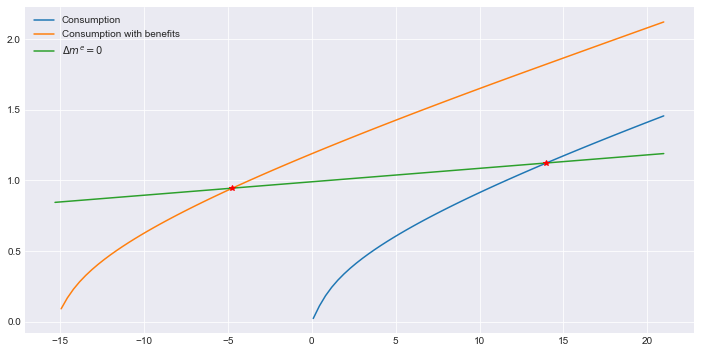

In [3]:
from scipy.optimize import fsolve
num_m = 100
m_min = -shift
m_max = 1.5*target
m_range = np.linspace(m_min, m_max, num_m)

# Extract c_function
cfun = TBSagent.solution[0].cFunc

# Construct c_function with benefits
cfun_b = lambda m: cfun(m + shift)

# Find delta_M = 0 locus
Rcal = Rfree/Gamma
m_locus = lambda m: (1-1/Rcal)*m + 1/Rcal

# Plot
plt.figure(figsize = (width, height))
plt.plot(m_range, cfun(m_range), label = 'Consumption')
plt.plot(m_range, cfun_b(m_range), label = 'Consumption with benefits')
plt.plot(m_range, m_locus(m_range), label = '$\Delta m^e = 0$')
plt.plot(target,cfun(target),'*r')

# Find new target wealth
target_b = fsolve(lambda m: cfun_b(m) - m_locus(m), 0)
plt.plot(target_b,cfun_b(target_b),'*r')
plt.legend()

## b)

In [4]:
def me_dynamic(agent,mt,ct):
    mt1 = (mt - ct)*agent.Rcal + 1
    return(mt1)

def cfun_b(agent,m):
    return( agent.solution[0].cFunc(m + agent.shift) )

def m_locus(agent,m):
    return((1-1/agent.Rcal)*m + 1/agent.Rcal)

def saving_rate(agent, m, c):
    
    # Obtain end-of-period assets of the previous period
    # m_t = a_{t-1}R + P_t -> a_{t-1} = (m_t - P_t)/R
    # So normalizing by income a_{t-1} = (m_t - 1)/R
    a_t1 = (m - 1)/agent.Rfree
    
    # Find total income and saving rate
    # Income = r*a_{t-1} + P_t
    # Normalizing: income = r*a_{t-1} + 1
    tot_inc = (agent.Rfree-1)*a_t1 + 1
    s_rate = (tot_inc - c)/tot_inc
    
    return(s_rate)

def experiment(agent0,agent1,m0,periods,burnin):

    # Find relevant parameters and functions for each agent
    agents = [agent0, agent1]
    for agent in agents:
        
        # Find important params
        agent.Gamma = agent.PermGroFac/(1-agent.UnempPrb)
        agent.shift = agent.eta*agent.Gamma/(agent.Rfree - 1)
        agent.Rcal = agent.Rfree/agent.Gamma
        
        # Target wealth with benefits
        agent.target_b = fsolve(lambda m: cfun_b(agent,m) - m_locus(agent,m), 0)[0]
    
    # Phase diagrams
    num_m = 100
    m_min = -max([agent.shift for agent in agents])
    m_max = 1.5*max([abs(agent.target_b) for agent in agents])
    m_range = np.linspace(m_min, m_max, num_m)
    
    agents[0].label = 'Orig'
    agents[1].label = 'New'
    plt.figure(figsize = (width, height))
    for agent in agents:
        plt.plot(m_range,cfun_b(agent, m_range), label = agent.label + ' $c(m)$')
        plt.plot(m_range,m_locus(agent, m_range),'--k')
        plt.plot(agent.target_b, cfun_b(agent, agent.target_b),"*", label = agent.label + ' target') 
    plt.legend()
    plt.title('Phase diagram')
    plt.xlabel('Assets to income ratio $m$')
    plt.ylabel('Consumption to income ratio $c$')
    
    # Time diagram
    time = range(periods+burnin*2)
    
    # Initialize consumption, m, and saving rate
    m = np.zeros(len(time))
    m[0] = agents[0].target_b
    c = np.zeros(len(time))
    c[0] = cfun_b(agents[0],m[0])
    s = np.zeros(len(time))
    s[0] = saving_rate(agents[0],m = m[0],c = c[0])
    
    for i in range(1,periods+burnin*2):
        
        if ( i>(burnin-1) and i <= (burnin - 1 + periods) ):
            ag = 1
        else:
            ag = 0
        
        m[i] = me_dynamic(agents[ag],m[i-1],c[i-1])
        c[i] = cfun_b(agents[ag],m[i])
        s[i] = saving_rate(agents[ag],m = m[i],c = c[i])
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (width, height))
    
    ax1.plot(time,c,'*')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Consumption to income ratio')
    ax1.set_title('Consumption')
    
    ax2.plot(time,s,'*')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Savings rate')
    ax2.set_title('Saving')

### i.)

The following code simulates a situation in which a consumer starts out with his desired level of market resources and, suddently, he adopts the belief that the probability of becoming unemployed halves. This belief lasts for four periods and then reverts to the original state.

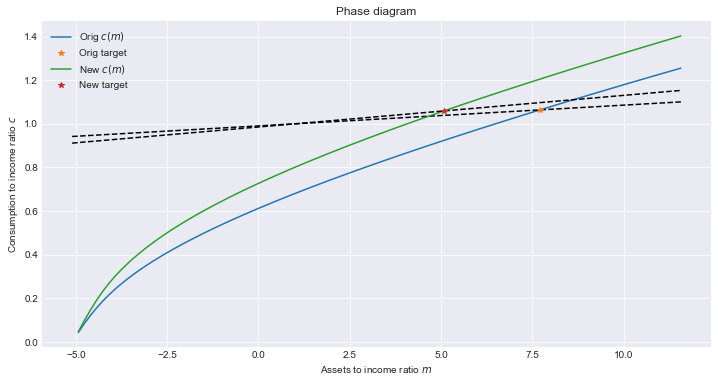

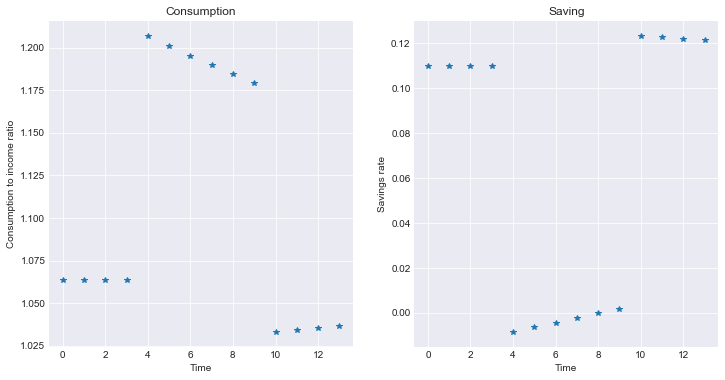

In [5]:
params_0 = {'UnempPrb' : UnempP,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : PermGroFac,
            'CRRA' : CRRA}

params_1 = {'UnempPrb' : UnempP/2,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : PermGroFac,
            'CRRA' : CRRA}

# Create and solve agent
agent0 = TractableConsumerType(**params_0)
agent1 = TractableConsumerType(**params_1)
agent0.solve()
agent1.solve()

agent0.eta = 0.15
agent1.eta = 0.15

experiment(agent0,agent1,m0 = agent0.mTarg,periods = 6, burnin = 4)

### ii.)

The following code simulates a situation in which a consumer starts out with his desired level of market resources and, suddently, he adopts the belief that the expected wage growth ($g$) duplicates. This belief lasts for four periods and then reverts to the original state.

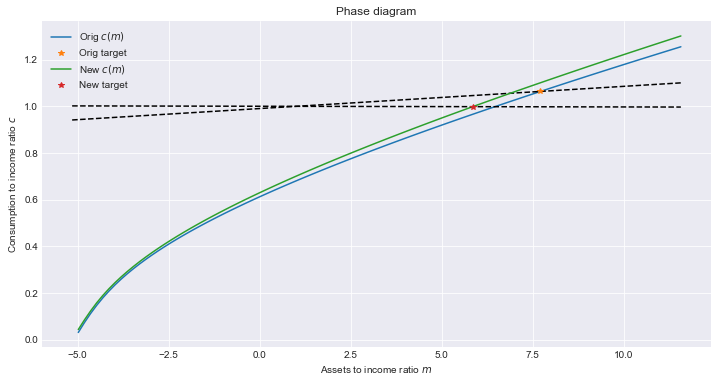

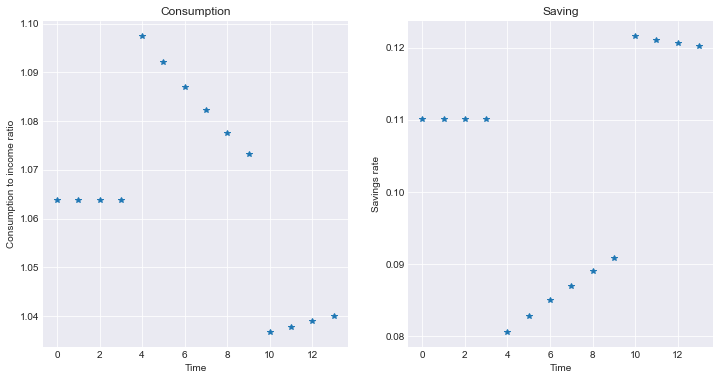

In [6]:
params_0 = {'UnempPrb' : UnempP,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : PermGroFac,
            'CRRA' : CRRA}

params_1 = {'UnempPrb' : UnempP,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : 1+2*(PermGroFac-1),
            'CRRA' : CRRA}

# Create and solve agent
agent0 = TractableConsumerType(**params_0)
agent1 = TractableConsumerType(**params_1)
agent0.solve()
agent1.solve()

agent0.eta = 0.15
agent1.eta = 0.15

experiment(agent0,agent1,m0 = agent0.mTarg,periods = 6, burnin = 4)

### iii.)

The following code simulates a situation in which a consumer starts out with his desired level of market resources and, suddently, he adopts the belief that $\eta$ passes from $0.15$ to $0.3$, making the unemployment support twice as generous. This belief lasts for four periods and then reverts to the original state.

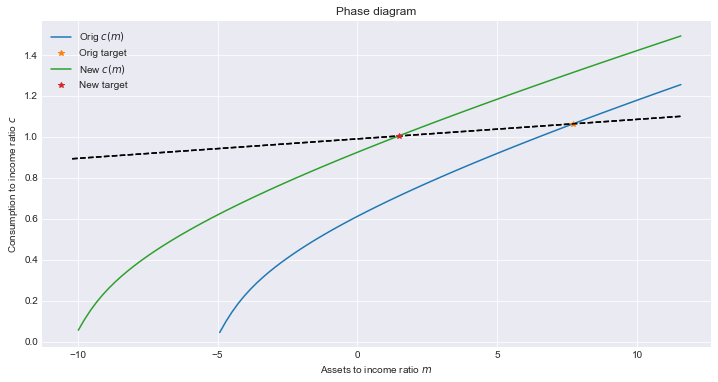

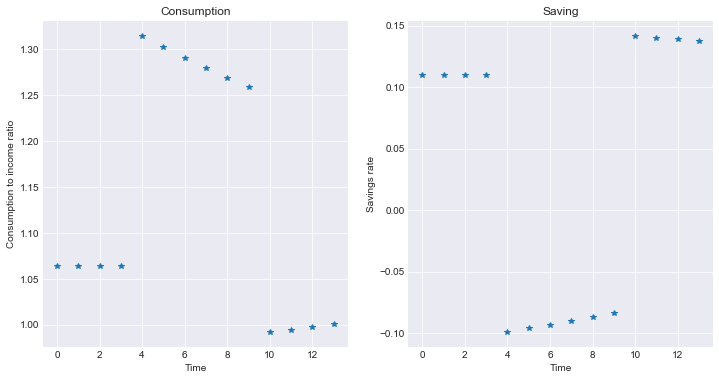

In [7]:
params_0 = {'UnempPrb' : UnempP,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : PermGroFac,
            'CRRA' : CRRA}

params_1 = {'UnempPrb' : UnempP,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : PermGroFac,
            'CRRA' : CRRA}

# Create and solve agent
agent0 = TractableConsumerType(**params_0)
agent1 = TractableConsumerType(**params_1)
agent0.solve()
agent1.solve()

agent0.eta = 0.15
agent1.eta = 0.30

experiment(agent0,agent1,m0 = agent0.mTarg,periods = 6, burnin = 4)

## 2. Asset Pricing In A Financial Crisis

